## CM4044: AI In Chemistry
## Semester 1 2020/21
 
<hr>

## Tutorial 4a: An Introduction to Machine Learning with Scikit-learn: I. Overview
## Objectives
### $\bullet$ Overview of building a machine learning model
### $\bullet$ Use Decision Tree
### $\bullet$ Use Random Forest

<hr>

From this tutorial, we start to learn basic knowledge of machine learning (ML) based on the use of Scikit-learn package. Scikit-learn has become the most popular Python ML frame since 2016.

Scikit-learn is a high level framework designed for supervised and unsupervised machine learning algorithms.The scikit-learn [website](https://scikit-learn.org/stable/index.html) contains a lot of information, such as in-depth [documentation](https://scikit-learn.org/stable/user_guide.html), beginner's [tutorials](https://scikit-learn.org/stable/tutorial/index.html), [API](https://scikit-learn.org/stable/modules/classes.html), and many others.You are strongly recommended to surf the website to learn more information beyond the tutorials can cover.

In this tutorial, we will follow the online document, "Introduction to Machine Learning Micro-course" by Dan Becker in [Kaggle](https://www.kaggle.com/learn/intro-to-machine-learning). This is a wonderful introduction for beginner.

Let us start to walk through one simple machine learning model: use <span style="color:red">decision tree</span> to predict housing price. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science. 

So we firstly analyze the thinking behind the decision tree with some diagrams.

### What is decision tree?

A decision tree uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

The simplest decision tree is like this:

<img src="./Decision_Tree_Housing_Price_1.png" width="300" height="300" />

It divides houses into only two categories. <u>The predicted price for any house under consideration is the historical average price of houses in the same category.</u>

We use data to decide how to break the houses into two groups, and then again to determine the predicted price in each group. This step of capturing patterns from data is called <span style="color:red">fitting</span> or <span style="color:red">training</span> the model. The data used to fit the model is called the <span style="color:red">training data</span>.

The details of how the model is fit (e.g. how to split up the data) is complex enough that we will save it for later. After the model has been fit, you can apply it to new data to predict prices of additional homes.

### Improvement

Which of the following two decisions trees is more likely to result from fitting the real estate training data?

<img src="./Decision_Tree_Housing_Price_2.png" width="600" height="600" />

The decision tree on the left (Decision Tree 1) probably makes more sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms. The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc.

You can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this:

<img src="./Decision_Tree_Housing_Price_3.png" width="600" height="600" />

You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. The predicted price for the house is at the bottom of the tree. The point at the bottom where we make a prediction is called a "leaf".

The splits and values at the leaves will be determined by the data.

So it is time to start the real work flow to build a ML model.

## Step 1: Examine data

The first step in any machine learning project is familiarize yourself with the data. Sometimes, this step is also called **explorary data analysis (EDA)**. In this tutorial, as an example, we'll look at data about home prices in Melbourne, Australia, stored in the file `melb_data.csv`. We use Pandas to load and examine data.

In [1]:
import pandas as pd

# save filepath to variable for easier access
melbourne_file_path = './melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
#print the shape of data
melbourne_data.shape

(13580, 21)

In [2]:
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

## Step 2: Select data for modelling

Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).

In [3]:
melbourne_data.info()   # this methods provides a concise list of table information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

- `DataFrame.info()` is very useful method. From the above information list, we know that there are missing data in columns of 'BuildingArea', 'YearBuilt', and 'CouncilArea'. We have to handle missing data properly.
- The columns with data type of `Object` are generally text information, they are `categorical` data.

### 2.1 Handle missing data 

There are a lot of reasons a data set can have missing data. There are also a lot of strategies to handle missing data. Fow now, we use the simple approach to drop those rows having missing data.(A follow-up tutorial will focus on more strategies about this point.)

In [4]:
# dropna drops missing values (think of na as "not available")
melbourne_data.dropna(axis=0, inplace=True)    # inplace = True, the table is modified, the method returns None
melbourne_data.shape

(6196, 21)

### 2.2 Select the prediction target

You can pull out a variable with dot-notation from a `DataFrame` object. This single column is stored in a `Series` object, which is broadly like a `DataFrame` with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the <span style="color:red">prediction target</span>. By convention, the <span style="color:red">prediction target</span> is called <span style="color:red">y</span>. So the code we need to save the house prices in the Melbourne data is

In [5]:
y = melbourne_data.Price

### 2.3 Choose "features"

The columns that are inputted into our model (and later used to make predictions) are called <span style="color:red">features</span>. In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called <span style="color:red">X</span>.

In [7]:
X = melbourne_data[melbourne_features]

Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [10]:
X.tail()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025
12212,6,3.0,1087.0,-37.81038,144.89389


In [11]:
X.sample(10)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
834,4,3.0,313.0,-37.91640,145.07650
4527,2,1.0,118.0,-37.72320,144.91540
982,4,2.0,299.0,-37.82820,145.13010
10999,4,2.0,573.0,-37.70477,145.16552
2681,3,2.0,164.0,-37.79480,144.88680
3563,2,1.0,0.0,-37.78990,144.92310
11733,3,2.0,91.0,-37.77449,144.88011
1200,4,1.0,1000.0,-37.93100,145.01630
3861,3,3.0,0.0,-37.88120,145.05700
7368,3,2.0,263.0,-37.82660,144.98940


Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

And we should visulise the data. For example, we display the histogram of price, y, to understand its distribution:

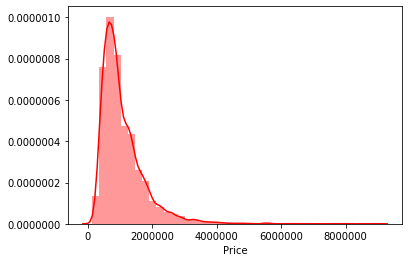

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.distplot(y, bins = 40, color = 'r')
#y.hist(bins=40)

A scatter plot to correlate location and room number:

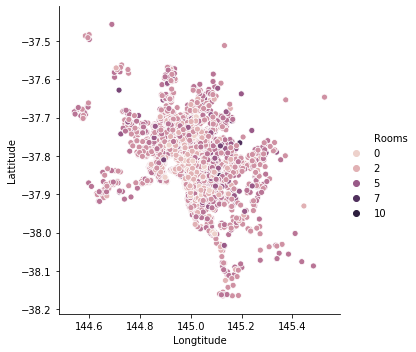

In [25]:
#ax = sns.relplot(x='Longtitude', y='Lattitude', hue = 'Rooms', palette = 'bright', data=X, kind='scatter')
ax = sns.relplot(x='Longtitude', y='Lattitude', hue = 'Rooms', data=X, kind='scatter')

A heat map:

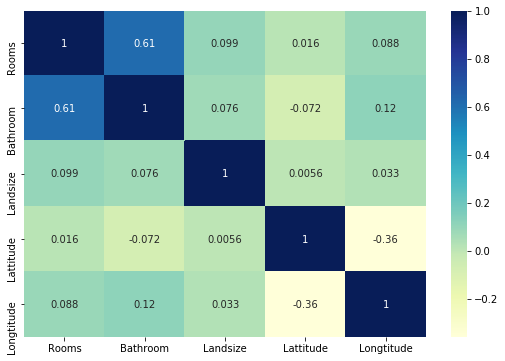

In [14]:
# Calculate correlations
corr = X.corr()

plt.figure(figsize=(9,6))
# Heatmap
ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")



### 2.4 Building your model

You will use the scikit-learn library to create your models. When coding, this library is written as <span style="color:red">sklearn</span>, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

- Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: Capture patterns from provided data. This is the heart of modeling.
- Predict: Just what it sounds like
- Evaluate: Determine how accurate the model's predictions are.
- Save model: Save model for future use

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model = melbourne_model.fit(X, y)


Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

**We now have a fitted model that we can use to make predictions.**

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [16]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


You can do a comparison with data in y.

In [17]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

They are exactly the same! Is it a good model?

## Step 3: Model validation

You've built a model. But how good is it?

In this step, you will learn to use model validation to measure the quality of your model. Measuring model quality is the key to iteratively improving your models.

### What is model validation?

You'll want to evaluate almost every model you ever build. In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their training data and compare those predictions to the target values in the training data. You'll see the problem with this approach and how to solve it in a moment, but let's think about how we'd do this first.

You'd first need to summarize the model quality into an understandable way. If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called <span style="color:red">Mean Absolute Error</span>(also called MAE). Let's break down this metric starting with the last word, error.

The prediction error for each house is: <span style="color:red">error=actual−predicted</span>. So, if a house cost 150,000 AUD and you predicted it would cost 100,000 AUD, the error is 50,000 AUD.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In practice, you will also see that there are other ways to evaluate a model, based on certain scoring criteria.

On average, our predictions are off by about <span style="color:red">X</span>.

In [18]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

### Split data into two subsets: training set and validation set

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. This is bad practice!

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called <span style="color:red">validation data</span>.

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [19]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model = melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

277803.5205508931


## Wow!
Your mean absolute error for the in-sample data was about 1100 dollars. Out-of-sample it is more than 250,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

There are many ways to improve this model, such as experimenting to find better features or different model types.

## Step 4: Optimizing model parameters

### Overfitting and underfitting

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's **depth**. Recall from the first lesson in this micro-course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree.

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called <span style="color:red">overfitting</span>, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called <span style="color:red">underfitting</span>.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in

<img src="./tree_overfitting_underfitting.png" width="400" height="400" />

## Tuning tree depth

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the `max_leaf_nodes` argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for `max_leaf_nodes`:

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [21]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 250, 500, 5000, 10000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 250  		 Mean Absolute Error:  269945
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996
Max leaf nodes: 10000  		 Mean Absolute Error:  271996


Of the options listed, 500 is the optimal number of leaves.

Here's the takeaway: Models can suffer from either:

- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use <u>validation</u> data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

Finally, we can save the model for later use. In scikit-learn, the model is save in the format of "Pickle". A ‘pickle‘ file is a way that python can save a data structure to a file (similar to how you might save your progress in a computer game).

Sci-kit learn has its own functions for pickling using `joblib` which is typically faster when saving larger files.

To save a pickle file we can use `joblib.dump()`:

In [22]:
import joblib
# Output a pickle file for the model
joblib.dump(melbourne_model, 'melbourne_model.pkl') # be careful this model is not optimized

['melbourne_model.pkl']

When we need to use the model, we can load it from harddisk with the function `joblib.load()`:

In [23]:
# Load the pickle file
mlb_model = joblib.load('melbourne_model.pkl') 

## Step 5: A better model: random forest

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the **random forest** as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. <u>It generally has much better predictive accuracy than a single decision tree and it works well with default parameters</u>. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

We build a random forest model similarly to how we built a decision tree in scikit-learn - this time using the `RandomForestRegressor` class instead of `DecisionTreeRegressor`.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146


There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

### Summary

In this tutorial, we have learnt about the use of two machine learning alogrithms: `ecision tree` and `random forest` for a regression problem. These two methods can also be used for classification purpose. Below are the details of these methods:

`sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)` 

`sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)`

`sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)`

`sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)`

These method have many options and every option has default value. User can to pass in values or use the default options in these methonds.
